In [1]:
# importing the required libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# reading the data to pandas DataFrame

raw_data = pd.read_csv('data_stocks.csv')
raw_data

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.520,...,84.370,119.035,44.400,39.880,82.030,7.360,50.220,63.86,122.000,53.3500
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.480,...,84.370,119.035,44.110,39.880,82.030,7.380,50.220,63.74,121.770,53.3500
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.930,...,84.585,119.260,44.090,39.980,82.020,7.360,50.120,63.75,121.700,53.3650
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.440,...,84.460,119.260,44.250,39.990,82.020,7.350,50.160,63.88,121.700,53.3800
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.600,...,84.470,119.610,44.110,39.960,82.030,7.360,50.200,63.91,121.695,53.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41261,1504209360,2472.2200,44.7200,164.1100,155.0900,83.670,106.5650,114.4900,47.150,142.425,...,99.675,99.530,49.485,40.955,76.360,32.285,62.110,76.88,114.310,62.7250
41262,1504209420,2471.7700,44.7300,164.1200,155.1600,83.650,106.5900,114.5200,47.150,142.450,...,99.730,99.630,49.480,40.960,76.370,32.295,62.100,76.90,114.330,62.7100
41263,1504209480,2470.0300,44.7400,164.0100,155.0650,83.620,106.5200,114.4700,47.150,142.330,...,99.735,99.640,49.495,40.940,76.315,32.290,62.090,76.88,114.310,62.6850
41264,1504209540,2471.4900,44.7100,163.8800,154.9600,83.580,106.4000,114.3300,47.135,142.170,...,99.700,99.630,49.485,40.925,76.300,32.275,62.075,76.83,114.230,62.6301


So here we have 501 Stocks data over 41266 days. Approach would be to consider the Stocks as rows and data accross days as features then use clustering. But this will result into 41266 features. Obviously PCA will help here.

Let's first scale the data before applying PCA

In [3]:
# scaling data stockswise

scale = StandardScaler()
scale_data = scale.fit_transform(raw_data.drop(['DATE'],axis=1)).T

We have scaled stockwise, that is, for each stock price are scaled between 0 to 1 considering stockwise mean and standard deviation. After that we have transformed the data. So now each row represents a stock.

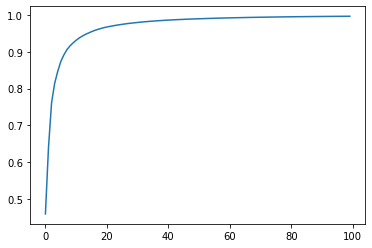

In [4]:
# applying PCA to find optimal number of components

pca = PCA()
pca.fit(scale_data)
plt.plot(pca.explained_variance_ratio_[:100].cumsum())

Here we see for 90% variance because for stock price data we can consider 90% variance to be good enough.

In [5]:
# fitting PCA with required number of Principal components and transforming the data

pca = PCA(n_components=10)
pca_data = pca.fit_transform(scale_data)

Now that we have reduced number of columns, we can apply KMeans to cluster

First let's find the number of clusters based on wcss

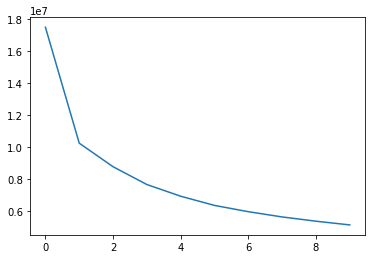

In [6]:
# plotting wcss for different number of clusters

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
plt.plot(wcss)

As per elbow curve, we choose 2 clusters by comparing with above plot

This means that there are 2 major unique patterns in the historical stock data.

In [7]:
# fitting KMeans with 2 clusters

kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(pca_data)

KMeans(n_clusters=2, random_state=42)

In [8]:
stock_clusters = pd.DataFrame(kmeans.predict(pca_data),columns=['cluster'])
stock_clusters['Stock'] = raw_data.drop(['DATE'],axis=1).columns
stock_clusters

,cluster,Stock
0,1,SP500
1,1,NASDAQ.AAL
2,1,NASDAQ.AAPL
3,1,NASDAQ.ADBE
4,1,NASDAQ.ADI
...,...,...
496,1,NYSE.XRX
497,1,NYSE.XYL
498,1,NYSE.YUM
499,0,NYSE.ZBH


Stocks with same cluster number will perform similar.

Since there are 2 clusters so we can say that there are 2 major unique patterns in the historical stock data.

So stocks within a cluster are moving together and stocks in different clusters are different from each other.